In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/Users/shuxincao/Desktop/NTU/miniproj/data/train.csv')
test=pd.read_csv('/Users/shuxincao/Desktop/NTU/miniproj/data/test.csv')
PassengerId=test['PassengerId']
all_data = pd.concat([train, test], ignore_index = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
table=all_data.describe()

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

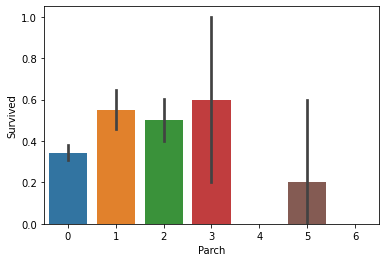

In [4]:
sns.barplot(data=train,x='Parch',y='Survived')

In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

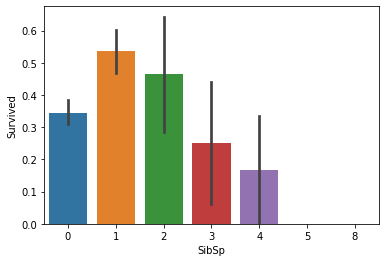

In [6]:
sns.barplot(data=train,x='SibSp',y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

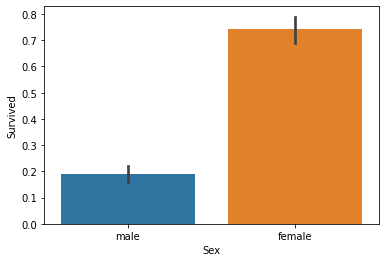

In [7]:
sns.barplot(x="Sex", y="Survived", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

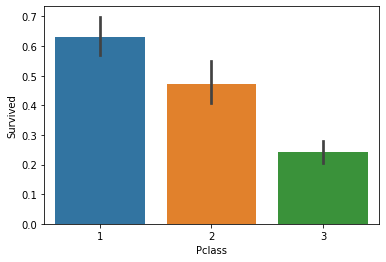

In [8]:
sns.barplot(x="Pclass", y="Survived", data=train)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

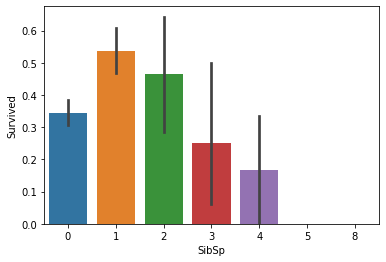

In [9]:
sns.barplot(x="SibSp", y="Survived", data=train)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

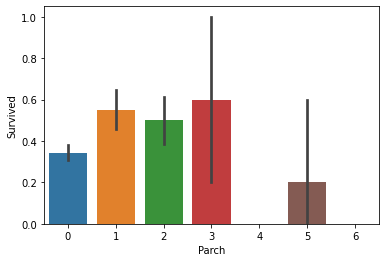

In [10]:
sns.barplot(x="Parch", y="Survived", data=train)

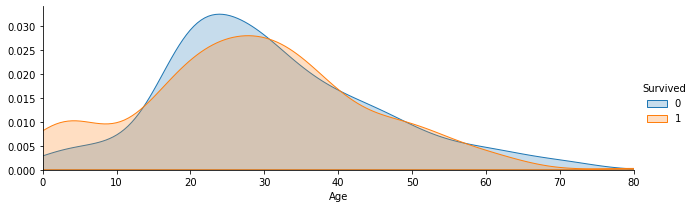

In [11]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

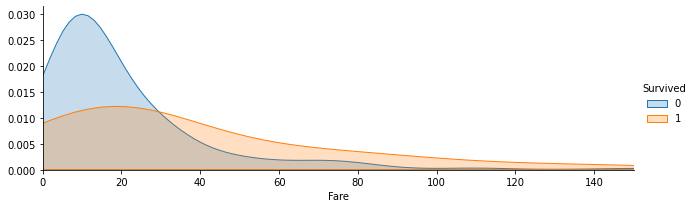

In [12]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

In [13]:
full=all_data
full['Cabin']=full['Cabin'].fillna('U')
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [14]:
full[full['Embarked'].isnull()]
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
full['Embarked']=full['Embarked'].fillna('S')

In [16]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


In [17]:
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean())

In [18]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Jonkheer          1
Lady              1
Sir               1
the Countess      1
Mme               1
Dona              1
Don               1
Capt              1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

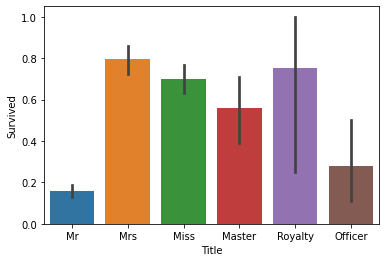

In [19]:
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()
sns.barplot(data=full,x='Title',y='Survived')

<AxesSubplot:xlabel='familyNum', ylabel='Survived'>

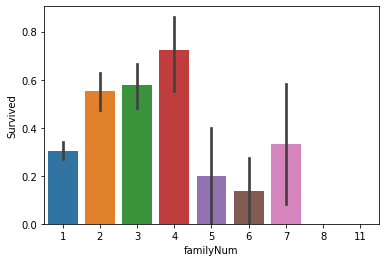

In [20]:
full['familyNum']=full['Parch']+full['SibSp']+1
sns.barplot(data=full,x='familyNum',y='Survived')

In [21]:
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2

full['familySize']=full['familyNum'].map(familysize)
full['familySize'].value_counts()

0    790
1    437
2     82
Name: familySize, dtype: int64

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

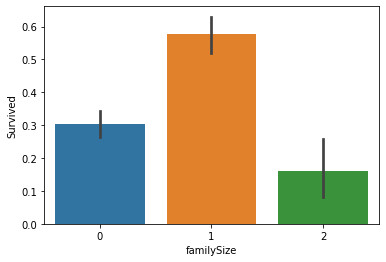

In [22]:
sns.barplot(data=full,x='familySize',y='Survived')

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

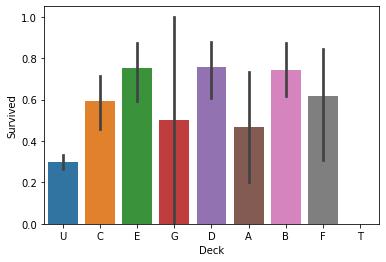

In [23]:
full['Deck']=full['Cabin'].map(lambda x:x[0])
sns.barplot(data=full,x='Deck',y='Survived')

In [24]:
#Number of passenger with same ticket number
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
TickCountDict.head()

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
347077           7
Name: Ticket, dtype: int64

<AxesSubplot:xlabel='TickCot', ylabel='Survived'>

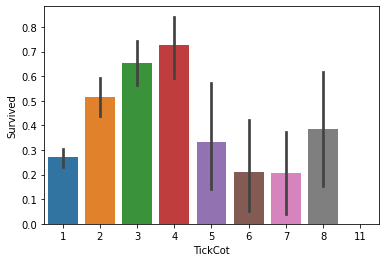

In [25]:
#Incorporate the number of passengers with the same ticket number into the data set
full['TickCot']=full['Ticket'].map(TickCountDict)
full['TickCot'].head()
sns.barplot(data=full,x='TickCot',y='Survived')

<AxesSubplot:xlabel='TickGroup', ylabel='Survived'>

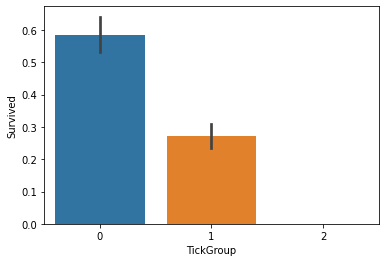

In [26]:
#According to the size of TickCot, TickGroup is divided into three categories.
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#Get the category of each passenger TickGroup
full['TickGroup']=full['TickCot'].map(TickCountGroup)
#View the relationship between TickGroup and Survived
sns.barplot(data=full,x='TickGroup',y='Survived')

In [27]:
#Filtering data sets
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
#Conduct one-hot encoding
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
#View the correlation between variables
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

Pclass          -0.408106
Title_Master    -0.385380
Title_Miss      -0.282977
SibSp           -0.243699
familyNum       -0.240229
TickCot         -0.185284
Parch           -0.150917
Title_Royalty    0.057337
Title_Officer    0.166771
Title_Mr         0.183965
Title_Mrs        0.215091
Age              1.000000
Name: Age, dtype: float64

In [28]:
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)
AgePre.head()

,Age,Parch,Pclass,SibSp,familyNum,TickCot,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,3,1,2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,0,3,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.0,0,1,1,2,2,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,35.0,0,3,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [29]:
#Split experimental set and prediction set
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#Generate characteristics and labels of experimental data
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']
#Generate features of prediction data
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#Build random forest model
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [30]:
#Model score
rfr.score(AgeKnown_X,AgeKnown_y)

0.5874496686755084

In [31]:
#Predict age
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
#Fill forecast data
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y
full.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familySize   1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCot      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [32]:
#Extract the last name of the passenger and the corresponding number of passengers
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)
#Divide the data into two groups
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]
#Analyze same group male
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()

0.0    89
1.0    19
0.5     3
Name: Survived, dtype: int64

In [33]:
#Get a surname with a survival rate of 1
MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

Index(['Beane', 'Beckwith', 'Bishop', 'Cardeza', 'Chambers', 'Dick',
       'Duff Gordon', 'Frauenthal', 'Frolicher-Stehli', 'Goldenberg',
       'Greenfield', 'Harder', 'Hoyt', 'Kimball', 'Lindqvist', 'McCoy',
       'Nakid', 'Persson', 'Taylor'],
      dtype='object', name='Surname')

In [34]:
#Analyze the same group women and children
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()

1.000000    115
0.000000     27
0.750000      2
0.333333      1
0.142857      1
Name: Survived, dtype: int64

In [35]:
#Get a surname with 0 survival rate
FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict

Index(['Ahlin', 'Arnold-Franchi', 'Barbara', 'Boulos', 'Bourke', 'Caram',
       'Danbom', 'Ford', 'Goodwin', 'Ilmakangas', 'Johnston', 'Jussila',
       'Lahtinen', 'Lefebre', 'Lobb', 'Palsson', 'Panula', 'Rice', 'Robins',
       'Rosblom', 'Sage', 'Skoog', 'Strom', 'Turpin', 'Van Impe',
       'Vander Planke', 'Zabour'],
      dtype='object', name='Surname')

In [36]:
# Modify the male data of these surnames in the data set: 1. Change gender to female; 2. Change age to 5.
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'
# Revise the data of women and children with these surnames in the data set: 1. Change the gender to male; 2. Change the age to 60.
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'


In [37]:
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#Check the correlation between each feature and label
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.059549
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'familyNum'),
  Text(7.5, 0, 'familySize'),
  Text(8.5, 0, 'TickCot'),
  Text(9.5, 0, 'TickGroup')])

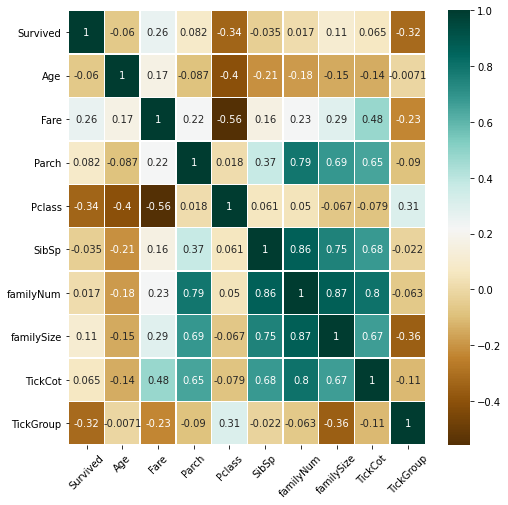

In [38]:
#plot the heatmap, check the correlation between Survived and other features
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','familyNum','familySize','Deck',
                     'TickCot','TickGroup']].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [39]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')
fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [66]:
fullSel.head()

,Survived,Pclass,Age,Fare,familySize,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_U,Pclass_1,Pclass_2,Pclass_3,TickGroup_0,TickGroup_1,TickGroup_2,familySize_0,familySize_1,familySize_2
0,0.0,3,22.0,7.2500,1,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
1,1.0,1,38.0,71.2833,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,1.0,3,26.0,7.9250,0,1,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
3,1.0,1,35.0,53.1000,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0.0,3,35.0,8.0500,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0


In [40]:
#Split experimental data and forecast data
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]
experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']
preData_X=preData.drop('Survived',axis=1)
#Import machine learning algorithm library
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
#Set kfold, split the data set by cross sampling
kfold=StratifiedKFold(n_splits=10)
#Summary of different model algorithms
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [41]:
#Different machine learning cross-validation results summary
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,experData_X,experData_y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))

In [42]:
#Find the mean and standard deviation of the model score
cv_means=[]
cv_std=[]
for cv_result in cv_results:
     cv_means.append(cv_result.mean())
     cv_std.append(cv_result.std())
    
#Summary data
cvResDf=pd.DataFrame({'cv_mean':cv_means,
                      'cv_std': cv_std,
                      'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                   'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.675718,0.042975,SVC
1,0.785718,0.056291,DecisionTreeCla
2,0.813720,0.035071,RandomForestCla
3,0.800262,0.046075,ExtraTreesCla
4,0.835044,0.040397,GradientBoostingCla
5,0.729513,0.028206,KNN
6,0.831660,0.032888,LR
7,0.826080,0.033532,LinearDiscrimiAna


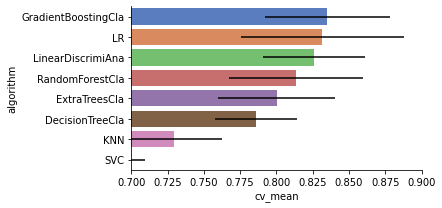

In [43]:
cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [68]:
#GradientBoostingClassifier
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
modelgsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
print(modelgsGBC.para)
modelgsGBC.fit(experData_X,experData_y)
#LogisticRegression
modelLR=LogisticRegression()
LR_param_grid = {'C' : [1,2,3],
                'penalty':['l1','l2']}
modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_grid, cv=kfold, 
                                     scoring="accuracy", n_jobs= -1, verbose = 1)
modelgsLR.fit(experData_X,experData_y)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)
Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [45]:
#modelgsGBC模型
print('modelgsGBC best score：%.3f'%modelgsGBC.best_score_)
#modelgsLR模型
print('modelgsLR best score：%.3f'%modelgsLR.best_score_)

modelgsGBC best score：0.842
modelgsLR best score：0.833


<Figure size 432x288 with 0 Axes>

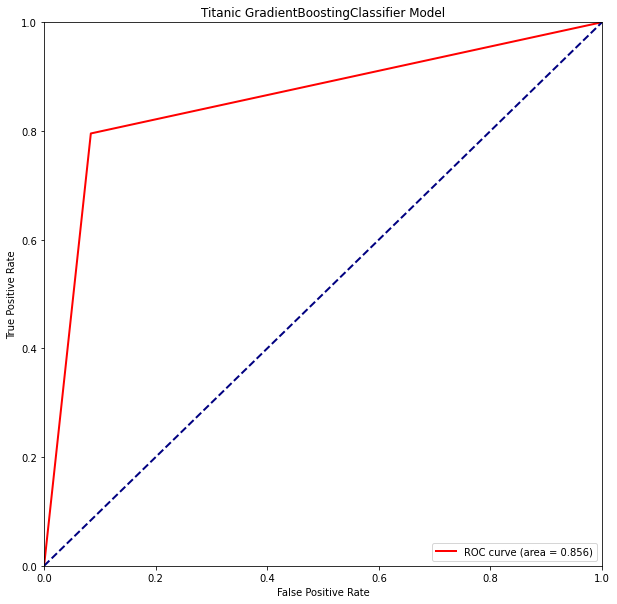

In [46]:
#View model ROC curve
#Find the predicted value of the test data model
modelgsGBCtestpre_y=modelgsGBC.predict(experData_X).astype(int)
#plot
from sklearn.metrics import roc_curve, auc  
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(experData_y, modelgsGBCtestpre_y) 
roc_auc = auc(fpr,tpr) 

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

In [47]:
#TitanicGBSmodle
GBCpreData_y=modelgsGBC.predict(preData_X)
GBCpreData_y=GBCpreData_y.astype(int)
GBCpreResultDf=pd.DataFrame()
GBCpreResultDf['PassengerId']=full['PassengerId'][full['Survived'].isnull()]
GBCpreResultDf['Survived']=GBCpreData_y
GBCpreResultDf
GBCpreResultDf.to_csv('/Users/shuxincao/Desktop/NTU/miniproj/data/TitanicGBSmodle.csv',index=False)

In [48]:
pred=pd.read_csv('/Users/shuxincao/Desktop/NTU/miniproj/data/result.csv')
result=pd.merge(test,pred,on='PassengerId')
result.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [49]:
result.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            33
        1           119
male    0           254
        1            12
Name: Survived, dtype: int64

In [50]:
def interval(age):
    if (age <18):
        return '0-18'
    elif (age>= 18):
        return '18+'
    else:
        return 'none'
result['Age']=result['Age'].map(interval)
result.groupby(['Age','Survived'])['Survived'].count()

Age   Survived
0-18  0            22
      1            19
18+   0           195
      1            96
none  0            70
      1            16
Name: Survived, dtype: int64

In [51]:
result['familyNum']=result['Parch']+result['SibSp']+1
def familysize(familyNum):
    if familyNum==1:
        return 'No member'
    elif (familyNum>=2):
        return 'At least one member'
    else:
        return 'none'

result['familySize']=result['familyNum'].map(familysize)
result.groupby(['familySize','Survived'])['Survived'].count()

familySize           Survived
At least one member  0            88
                     1            77
No member            0           199
                     1            54
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

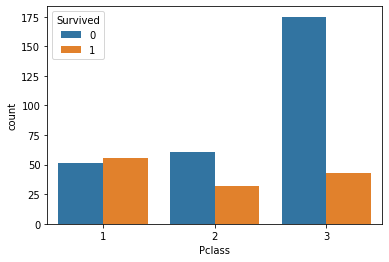

In [52]:
sns.countplot("Pclass", hue="Survived", data=result)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

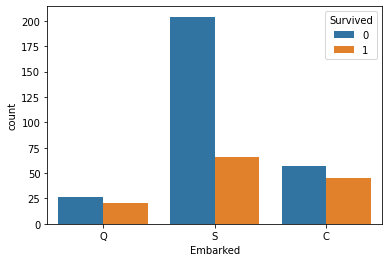

In [53]:
sns.countplot('Embarked',hue='Survived',data=result)

In [59]:
proc=full[full['Survived'].isnull()]
result1=pd.merge(proc,pred,on='PassengerId')
result1.head()

,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,familyNum,familySize,Deck,TickCot,TickGroup,Surname,SurnameNum,Survived_y
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,...,Q,Mr,1,0,U,1,1,Kelly,5,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,...,S,Mrs,2,1,U,1,1,Wilkes,1,1
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,...,Q,Mr,1,0,U,1,1,Myles,1,0
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,...,S,Mr,1,0,U,1,1,Wirz,1,0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,...,S,Mrs,3,1,U,2,0,Hirvonen,2,1


In [61]:
result1.groupby(['Sex','Survived_y'])['Survived_y'].count()

Sex     Survived_y
female  0              27
        1             119
male    0             260
        1              12
Name: Survived_y, dtype: int64

In [62]:
def interval(age):
    if (age <18):
        return '0-18'
    elif (age>= 18):
        return '18+'
    else:
        return 'none'
result1['Age']=result1['Age'].map(interval)
result1.groupby(['Age','Survived_y'])['Survived_y'].count()

Age   Survived_y
0-18  0              20
      1              22
18+   0             267
      1             109
Name: Survived_y, dtype: int64

In [63]:
result1['familyNum']=result1['Parch']+result1['SibSp']+1
def familysize(familyNum):
    if familyNum==1:
        return 'No member'
    elif (familyNum>=2):
        return 'At least one member'
    else:
        return 'none'

result1['familySize']=result1['familyNum'].map(familysize)
result1.groupby(['familySize','Survived_y'])['Survived_y'].count()

familySize           Survived_y
At least one member  0              88
                     1              77
No member            0             199
                     1              54
Name: Survived_y, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

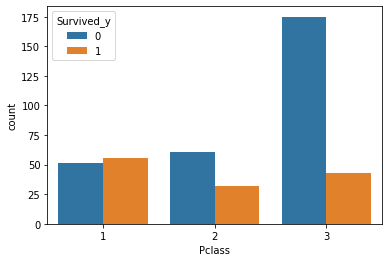

In [64]:
sns.countplot("Pclass", hue="Survived_y", data=result1)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

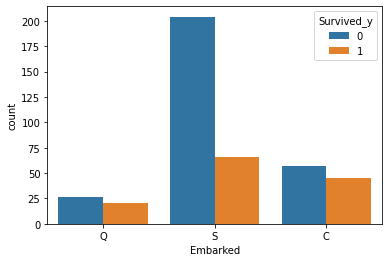

In [65]:
sns.countplot('Embarked',hue='Survived_y',data=result1)